In [1]:
import polars as pl
import matplotlib.pyplot as plt

In [257]:
df = pl.read_csv("results.csv")

22,12,13,15,7,2,5,1,14,9,23,8,21,17,10,18,3,11,4,20,0,19,6,16
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
0,1,2,0,2,1,3,3,0,3,2,0,0,3,2,3,1,1,2,1,0,1,3,2
0,1,2,0,2,1,3,3,0,3,2,0,0,3,2,3,1,1,2,1,0,2,3,1
0,1,2,0,2,1,3,3,0,3,2,0,0,3,2,3,1,1,2,1,1,0,3,2
0,1,2,0,2,1,3,3,0,3,2,0,0,3,2,3,1,1,2,1,1,2,3,0
0,1,2,0,2,1,3,3,0,3,2,0,0,3,2,3,1,1,2,1,2,0,3,1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
3,1,2,3,1,0,2,0,2,3,1,3,1,3,2,3,2,0,1,0,0,2,0,1
3,1,2,3,1,0,2,0,2,3,1,3,1,3,2,3,2,0,1,0,1,0,0,2
3,1,2,3,1,0,2,0,2,3,1,3,1,3,2,3,2,0,1,0,1,2,0,0


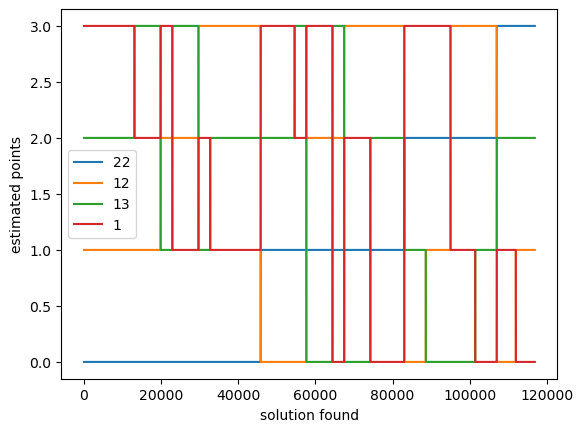

In [261]:
fig, ax = plt.subplots()
for col in ["22", "12", "13", "1"]:
    ax.plot(df[col], label=col)
ax.legend()
ax.set_xlabel("solution found")
ax.set_ylabel("estimated points")
plt.show()

In [268]:
estimates = (
    pl.concat([
        df[col]
        .value_counts()
        .with_columns(
            (pl.col("count") / pl.col("count").sum()).alias("probability"),
            pl.lit(col).alias("team")
        )
        .drop("count")
        .rename({col: "points"})
        for col in df.columns
    ])
    .pivot(index="team", on="points", values="probability")
    .select("team", "0", "1", "2", "3")
    .fill_null(0)
)
with pl.Config(tbl_rows=200):
    display(estimates)

team,0,1,2,3
str,f64,f64,f64,f64
"""22""",0.39184,0.318456,0.205093,0.084611
"""12""",0.191265,0.267045,0.16799,0.373699
"""13""",0.22563,0.147453,0.458927,0.16799
"""15""",0.258625,0.159433,0.307913,0.274028
"""7""",0.258625,0.159433,0.307913,0.274028
"""2""",0.37678,0.574206,0.049014,0.0
"""5""",0.105969,0.106928,0.335159,0.451944
"""1""",0.191265,0.267045,0.16799,0.373699
"""14""",0.020537,0.374589,0.513417,0.091457
